#1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#2. Load Dataset(csv file)

In [3]:
df = pd.read_csv("/content/heart_disease_100.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (100, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,3,112,442,0,0,166,0,0.2,1,2,0,0
1,57,1,0,183,429,1,0,107,1,4.7,1,0,1,0
2,43,1,2,160,272,0,1,82,1,3.8,1,3,0,1
3,71,0,1,112,129,0,1,183,0,4.4,2,4,1,0
4,36,0,0,113,160,1,1,83,1,1.3,2,2,2,1


#3. Data Preprocessing (checking for missing values)

In [4]:
print(df.isnull().sum())   # check missing values

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#4. Exploratory Data Analysis (EDA)

Target distribution

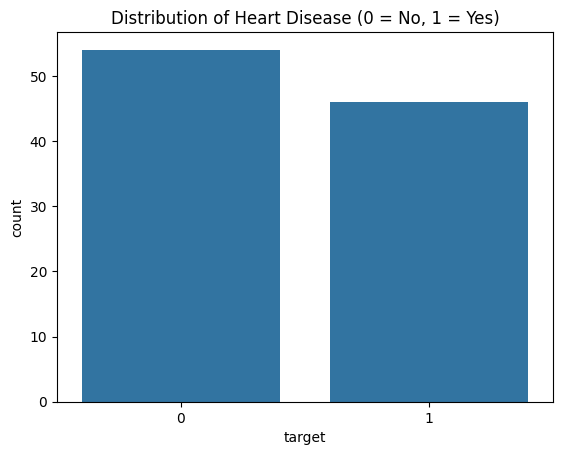

In [7]:
sns.countplot(x="target", data=df)
plt.title("Distribution of Heart Disease (0 = No, 1 = Yes)")
plt.show()



Correlation heatmap

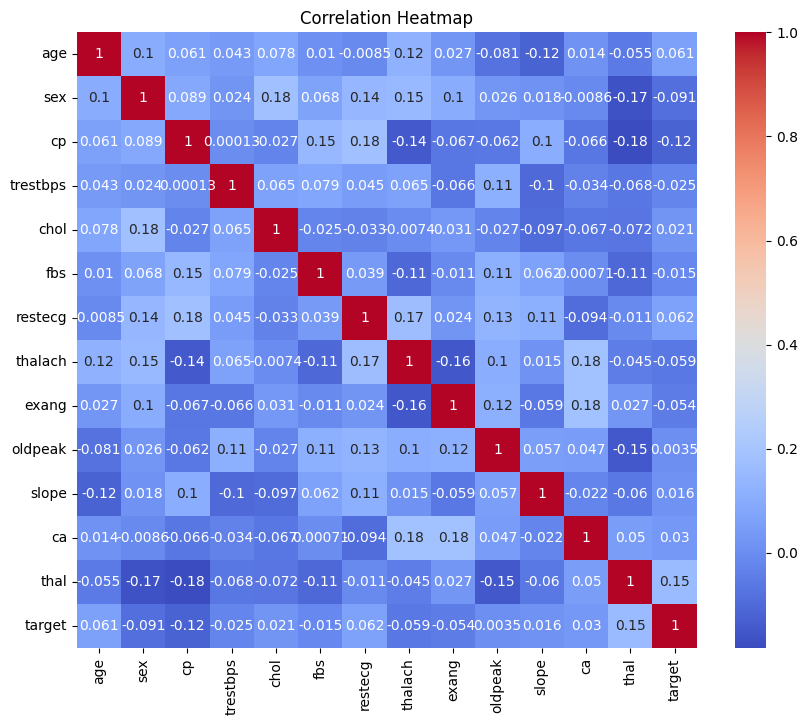

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Histograms

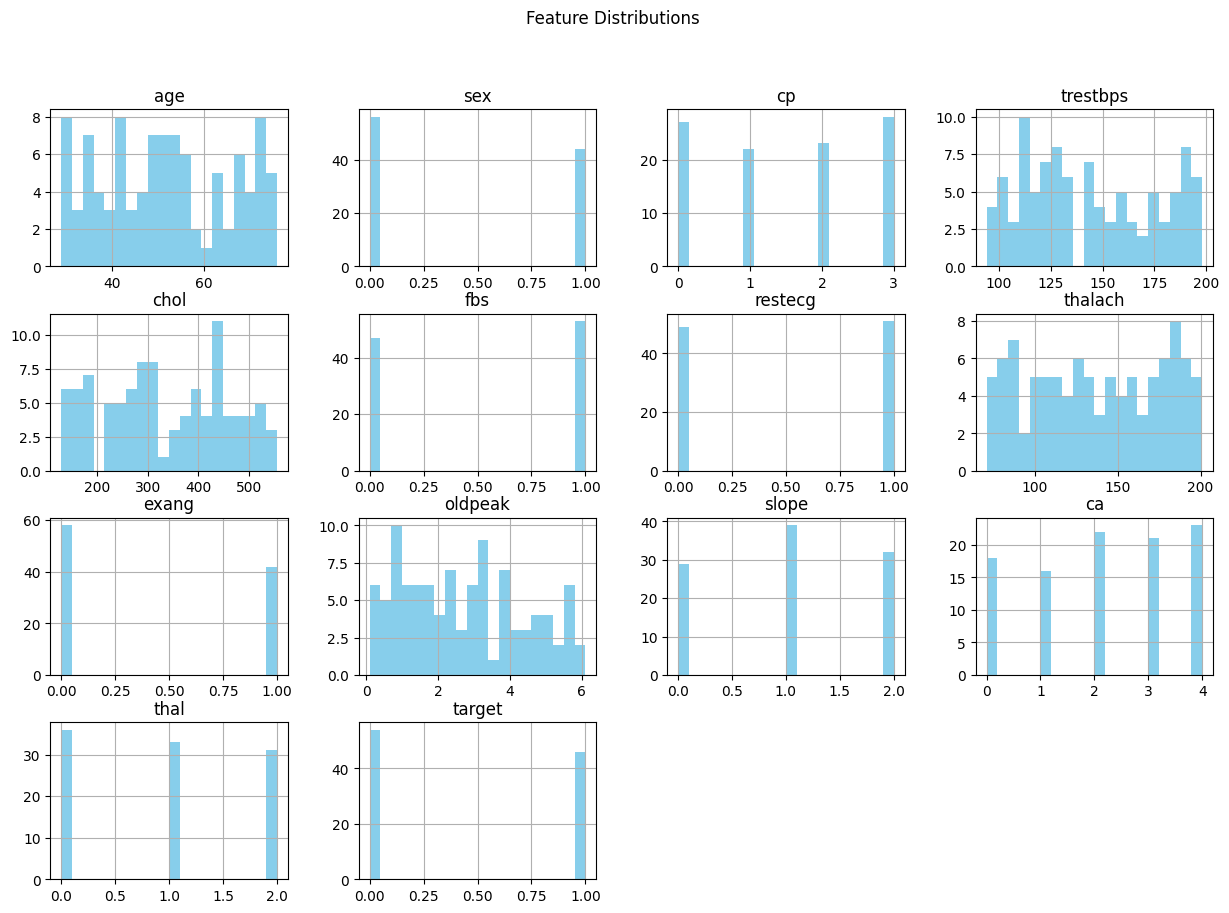

In [8]:
df.hist(bins=20, figsize=(15,10), color="skyblue")
plt.suptitle("Feature Distributions")
plt.show()

Boxplots for selected features vs Target

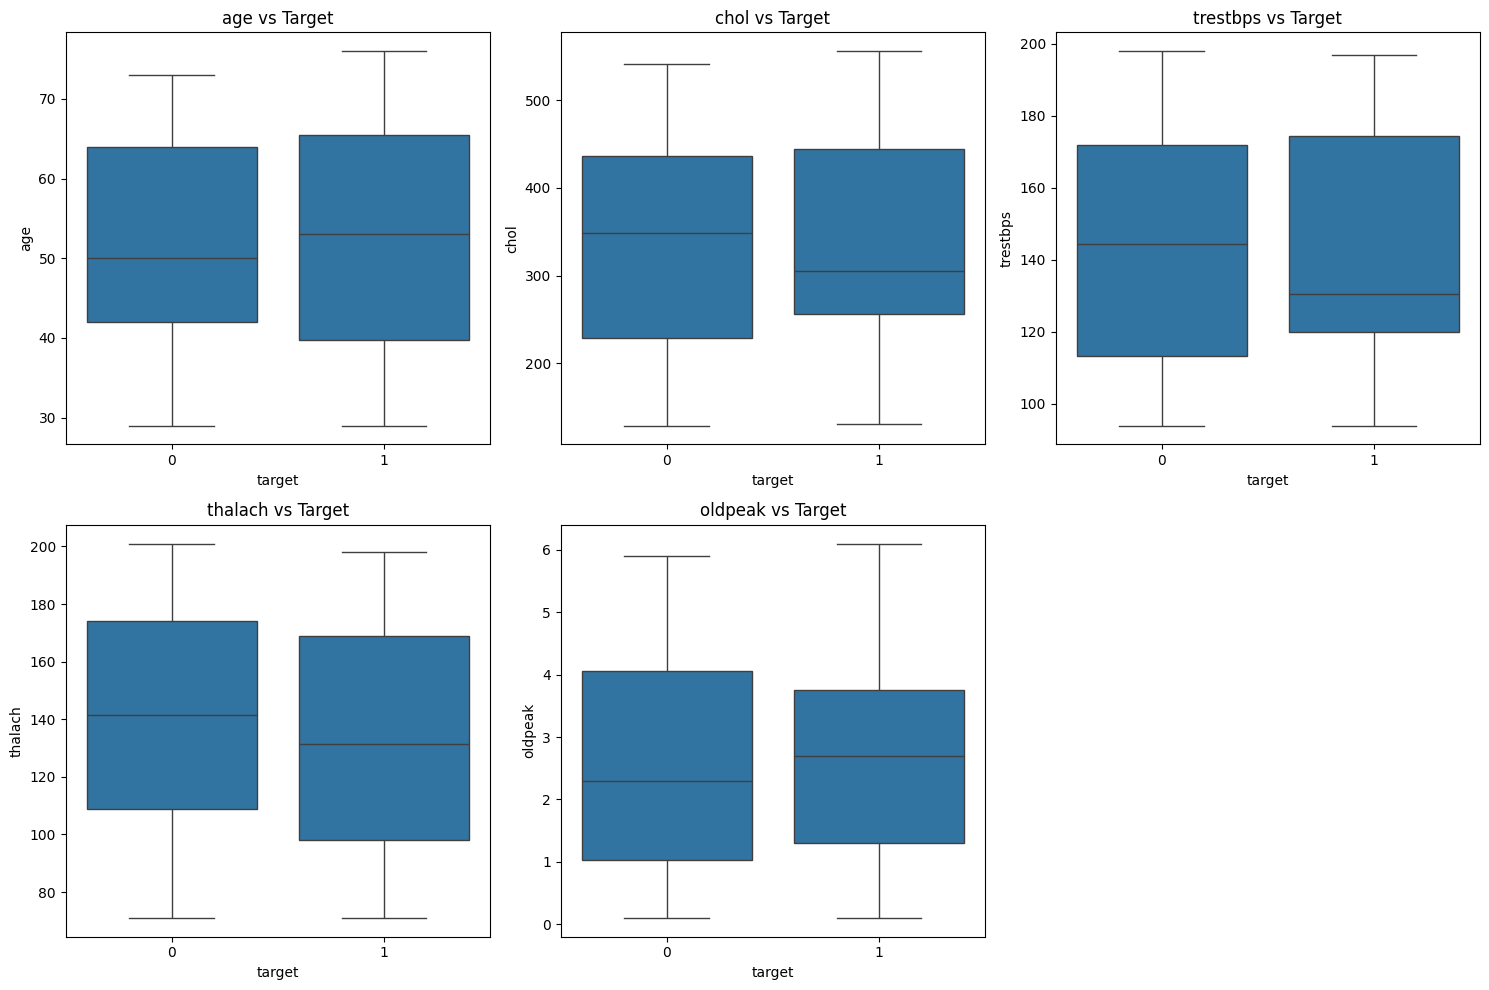

In [9]:
plt.figure(figsize=(15,10))
for i, col in enumerate(["age","chol","trestbps","thalach","oldpeak"]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()

#5. Model Training

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}


In [11]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_prob)

    results.append([name, acc, prec, rec, f1, roc])

 Results table

In [12]:
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score","ROC-AUC"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression      0.35   0.111111  0.166667  0.133333  0.238095
1        Decision Tree      0.30   0.250000  0.666667  0.363636  0.404762
2        Random Forest      0.45   0.272727  0.500000  0.352941  0.220238
3       Neural Network      0.50   0.300000  0.500000  0.375000  0.357143


#6. Compare Models with Bar Chart

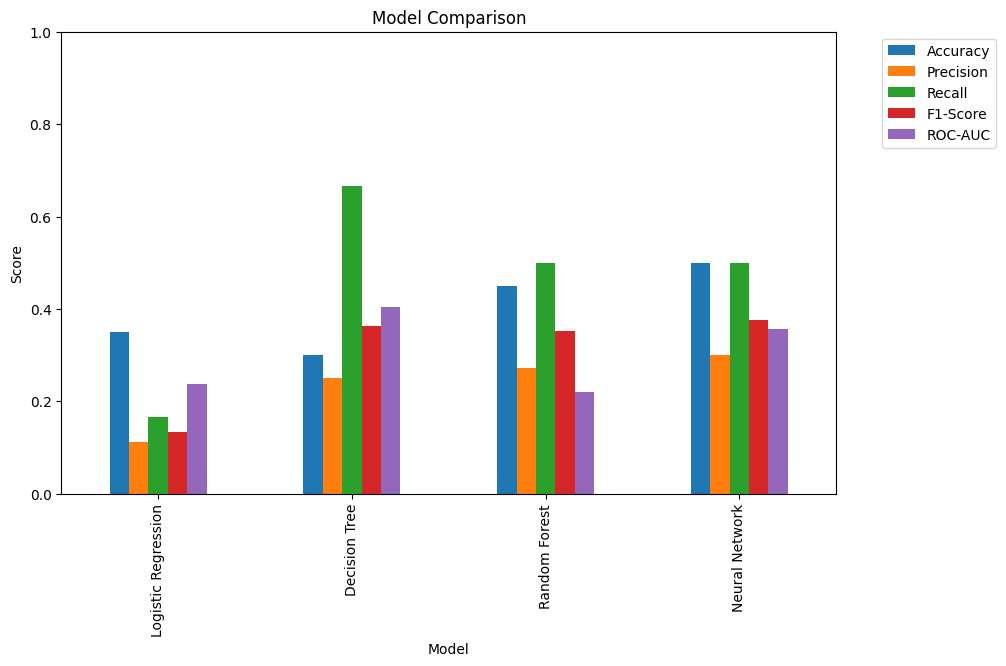

In [13]:
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score","ROC-AUC"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#7. ROC Curves

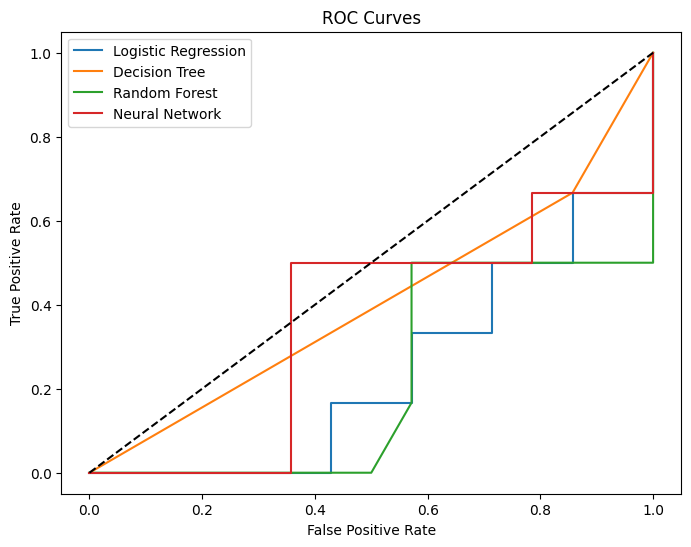

In [14]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

#8. Feature Importance (Tree Models)

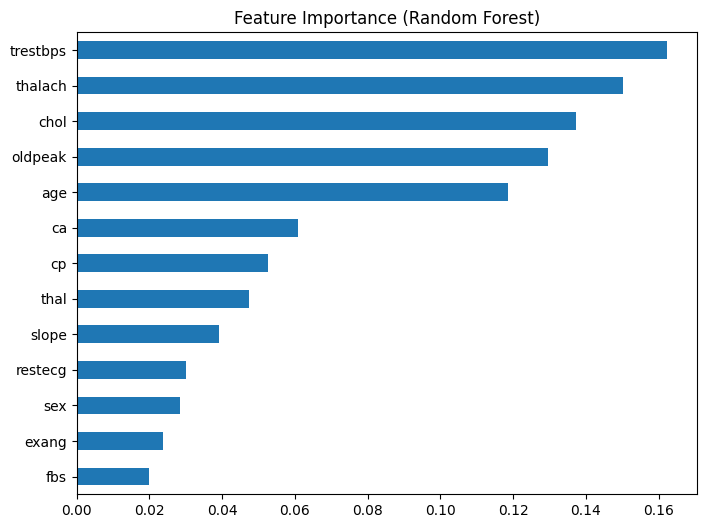

In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh", figsize=(8,6), title="Feature Importance (Random Forest)")
plt.show()

# Conclusion

In [16]:
print("""
Project Completed:
- Data was cleaned and explored with visualizations.
- Four models were trained: Logistic Regression, Decision Tree, Random Forest, and Neural Network.
- Models were evaluated with Accuracy, Precision, Recall, F1, and ROC-AUC.
- Random Forest and Neural Network usually perform best.
- Feature importance shows that age, chest pain type, and cholesterol are strong indicators of heart disease.

""")


Project Completed:
- Data was cleaned and explored with visualizations.
- Four models were trained: Logistic Regression, Decision Tree, Random Forest, and Neural Network.
- Models were evaluated with Accuracy, Precision, Recall, F1, and ROC-AUC.
- Random Forest and Neural Network usually perform best.
- Feature importance shows that age, chest pain type, and cholesterol are strong indicators of heart disease.


